# Lab - working with online data 

In this Lab , you will load , clean and store online flights data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
%matplotlib inline

In [3]:
import requests
import json
import pickle
import os
import csv

# Load the data

In [151]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")

In [152]:
res = json.loads(r.content)

In [153]:
df = pd.DataFrame(res['result']['records'])

## display the first rows 

In [154]:
#yaronweil 201365905 13/04/2022

In [155]:
df

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,W6,5456,WIZZAIR,2022-08-22T11:40:00,2022-08-22T13:42:00,D,VCE,VENICE,ונציה,VENICE,איטליה,ITALY,1,301-306,A,DEPARTED,המריאה
1,2,QAS,9HZFX,QUALITY AIR SERVICES,2022-08-22T13:45:00,2022-08-22T13:45:00,D,ATH,ATHENS,אתונה,ATHENS,יוון,GREECE,3,,,CANCELED,מבוטלת
2,3,LY,2221,EL AL ISRAEL AIRLINES,2022-08-22T13:20:00,2022-08-22T13:46:00,D,LCA,LARNACA,לרנקה,LARNACA,קפריסין,CYPRUS,3,,,DEPARTED,המריאה
3,4,6H,992,ISRAIR AIRLINES,2022-08-22T12:55:00,2022-08-22T13:47:00,A,SSH,SHARM EL SHEIKH,שארם אל-שייח,SHARM EL SHEIKH,מצרים,EGYPT,3,,,LANDED,נחתה
4,5,EK,2364,EMIRATES,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2897,2898,,,,2022-08-25T04:20:00,2022-08-25T07:20:00,,,,,,,,,,,,
2898,2899,,,,2022-08-25T01:20:00,2022-08-25T04:20:00,,,,,,,,,,,,
2899,2900,,,,2022-08-25T04:00:00,2022-08-25T07:00:00,,,,,,,,,,,,
2900,2901,,,,2022-08-25T14:10:00,2022-08-25T17:10:00,,,,,,,,,,,,


### display the last 10 rows - What's wrong? 

In [156]:
df.tail(10)

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
2892,2893,,,,2022-08-25T20:30:00,2022-08-25T23:30:00,,,,,,,,,,,,
2893,2894,,,,2022-08-24T11:00:00,2022-08-24T14:00:00,,,,,,,,,,,,
2894,2895,,,,2022-08-24T12:00:00,2022-08-24T15:00:00,,,,,,,,,,,,
2895,2896,,,,2022-08-25T04:20:00,2022-08-25T07:20:00,,,,,,,,,,,,
2896,2897,,,,2022-08-24T10:35:00,2022-08-24T13:35:00,,,,,,,,,,,,
2897,2898,,,,2022-08-25T04:20:00,2022-08-25T07:20:00,,,,,,,,,,,,
2898,2899,,,,2022-08-25T01:20:00,2022-08-25T04:20:00,,,,,,,,,,,,
2899,2900,,,,2022-08-25T04:00:00,2022-08-25T07:00:00,,,,,,,,,,,,
2900,2901,,,,2022-08-25T14:10:00,2022-08-25T17:10:00,,,,,,,,,,,,
2901,2902,,,,2022-08-25T15:20:00,2022-08-25T18:20:00,,,,,,,,,,,,


In [157]:
# all last 10 rows do not have data

# clean the data

how many rows contains empty strings for each Column? (use a for loop to display the column name and percentage)

In [158]:
df1 = df.replace(r'^\s*$', np.nan, regex=True)

In [159]:
percent_missing = df1.isnull().sum() * 10000 / len(df)

In [160]:
features_with_na=[features for features in df1.columns if df1[features].isnull().sum()>0]
for feature in features_with_na:
  print(feature, np.round(df1[feature].isnull().mean(),4), ' %missing values')

df1.isnull().sum()

CHOPER 0.042  %missing values
CHFLTN 0.042  %missing values
CHOPERD 0.042  %missing values
CHAORD 0.042  %missing values
CHLOC1 0.042  %missing values
CHLOC1D 0.042  %missing values
CHLOC1TH 0.042  %missing values
CHLOC1T 0.042  %missing values
CHLOC1CH 0.042  %missing values
CHLOCCT 0.042  %missing values
CHTERM 0.042  %missing values
CHCINT 0.7571  %missing values
CHCKZN 0.7571  %missing values
CHRMINE 0.042  %missing values
CHRMINH 0.042  %missing values


_id            0
CHOPER       122
CHFLTN       122
CHOPERD      122
CHSTOL         0
CHPTOL         0
CHAORD       122
CHLOC1       122
CHLOC1D      122
CHLOC1TH     122
CHLOC1T      122
CHLOC1CH     122
CHLOCCT      122
CHTERM       122
CHCINT      2197
CHCKZN      2197
CHRMINE      122
CHRMINH      122
dtype: int64

drop the empty rows  

In [161]:
df1=df1.dropna() 

In [162]:
df1

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,W6,5456,WIZZAIR,2022-08-22T11:40:00,2022-08-22T13:42:00,D,VCE,VENICE,ונציה,VENICE,איטליה,ITALY,1,301-306,A,DEPARTED,המריאה
4,5,EK,2364,EMIRATES,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
5,6,FZ,1210,FLYDUBAI,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
7,8,FR,6473,RYANAIR,2022-08-22T12:10:00,2022-08-22T13:52:00,D,BER,BERLIN BRANDENBURG INTL,ברלין,BERLIN,גרמניה,GERMANY,1,309-320,A,DEPARTED,המריאה
9,10,LY,327,EL AL ISRAEL AIRLINES,2022-08-22T13:30:00,2022-08-22T13:54:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,78-99,D,DEPARTED,המריאה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1729,LY,001,EL AL ISRAEL AIRLINES,2022-08-25T01:00:00,2022-08-25T01:00:00,D,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן
1729,1730,LY,015,EL AL ISRAEL AIRLINES,2022-08-25T01:00:00,2022-08-25T01:00:00,D,BOS,BOSTON-LOGAN INT,בוסטון,BOSTON,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן
1730,1731,LY,8807,EL AL ISRAEL AIRLINES,2022-08-25T01:00:00,2022-08-25T01:00:00,D,ADD,ADDIS ABABA,אדיס אבבה,ADDIS ABABA,אתיופיה,ETHIOPIA,3,27-33,A,ON TIME,בזמן
1731,1732,AM,7875,AERO MEXICO,2022-08-25T01:05:00,2022-08-25T01:05:00,D,LAX,LOS ANGELES,לוס אנג'לס,LOS ANGELES,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן


format the current date with underscore separation (%d_%m_%y)

In [163]:
from datetime import datetime

now = datetime.now()

date=current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)

Current Time = 13:39:14


In [164]:
date

'13:39:14'

Drop the _id column 

In [165]:
df1.drop(columns='_id' , inplace=True)

In [166]:
df1

,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,W6,5456,WIZZAIR,2022-08-22T11:40:00,2022-08-22T13:42:00,D,VCE,VENICE,ונציה,VENICE,איטליה,ITALY,1,301-306,A,DEPARTED,המריאה
4,EK,2364,EMIRATES,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
5,FZ,1210,FLYDUBAI,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
7,FR,6473,RYANAIR,2022-08-22T12:10:00,2022-08-22T13:52:00,D,BER,BERLIN BRANDENBURG INTL,ברלין,BERLIN,גרמניה,GERMANY,1,309-320,A,DEPARTED,המריאה
9,LY,327,EL AL ISRAEL AIRLINES,2022-08-22T13:30:00,2022-08-22T13:54:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,78-99,D,DEPARTED,המריאה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,LY,001,EL AL ISRAEL AIRLINES,2022-08-25T01:00:00,2022-08-25T01:00:00,D,JFK,NEW YORK - J.F.KENNEDY,ניו יורק,NEW YORK,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן
1729,LY,015,EL AL ISRAEL AIRLINES,2022-08-25T01:00:00,2022-08-25T01:00:00,D,BOS,BOSTON-LOGAN INT,בוסטון,BOSTON,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן
1730,LY,8807,EL AL ISRAEL AIRLINES,2022-08-25T01:00:00,2022-08-25T01:00:00,D,ADD,ADDIS ABABA,אדיס אבבה,ADDIS ABABA,אתיופיה,ETHIOPIA,3,27-33,A,ON TIME,בזמן
1731,AM,7875,AERO MEXICO,2022-08-25T01:05:00,2022-08-25T01:05:00,D,LAX,LOS ANGELES,לוס אנג'לס,LOS ANGELES,ארצות הברית,UNITED STATES,3,78-99,D,ON TIME,בזמן


save the raw data (add the current date to the file name) 

In [167]:
import csv

In [168]:

filename = 'rawdata'+date+' .csv'
with open(filename,mode='w',encoding='UTF-16',newline='') as rawdata_file:
    header = df1.columns
    writer = csv.writer(rawdata_file)
    writer.writerow(header)
    
    for row,row_data in df1.iterrows():
        writer.writerow(row_data)

OSError: [Errno 22] Invalid argument: 'rawdata13:39:14 .csv'

select the airline code and name without duplicates (CHOPER,CHOPERD)

In [169]:
df1 = df1.drop_duplicates(subset=['CHOPER', 'CHOPERD'])

In [170]:
df1

,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,W6,5456,WIZZAIR,2022-08-22T11:40:00,2022-08-22T13:42:00,D,VCE,VENICE,ונציה,VENICE,איטליה,ITALY,1,301-306,A,DEPARTED,המריאה
4,EK,2364,EMIRATES,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
5,FZ,1210,FLYDUBAI,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
7,FR,6473,RYANAIR,2022-08-22T12:10:00,2022-08-22T13:52:00,D,BER,BERLIN BRANDENBURG INTL,ברלין,BERLIN,גרמניה,GERMANY,1,309-320,A,DEPARTED,המריאה
9,LY,327,EL AL ISRAEL AIRLINES,2022-08-22T13:30:00,2022-08-22T13:54:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,78-99,D,DEPARTED,המריאה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199,BT,772,AIR BALTIC,2022-08-24T06:40:00,2022-08-24T06:40:00,D,RIX,RIGA,ריגה,RIGA,לטביה,LATVIA,3,12-14,A,ON TIME,בזמן
1247,MNE,431,TOMONTENEGRO,2022-08-24T08:30:00,2022-08-24T08:30:00,D,TGD,PODGORICA,פודגוריצה,PODGORICA,מונטנגרו,MONTENEGRO,3,65-68,C,ON TIME,בזמן
1299,WZ,026,RED WINGS AIRLINES,2022-08-24T10:10:00,2022-08-24T10:10:00,D,MRV,MINERALNYE VODY,מינראל וודי,MINERALNYE VODY,רוסיה,RUSSIAN FEDERATION,3,41-43,B,ON TIME,בזמן
1412,XQ,881,SUN EXPRESS,2022-08-24T13:55:00,2022-08-24T13:55:00,D,ADB,IZMIR-ADNAN MENDERES,איזמיר,IZMIR,טורקיה,TURKEY,3,24-26,A,ON TIME,בזמן


Load the file airlines.csv and merge it with a new data and save the file 'airline.csv'

In [171]:
path = 'C:\\python\\datasets'
os.chdir(path)

In [172]:
df2 = pd.read_csv('airlines.csv')

In [173]:
df3 = pd.concat([df1,df2])

In [174]:
filename = 'airlines'+date+' .csv'
with open(filename,mode='w',encoding='UTF-16',newline='') as rawdata_file:
    header = df3.columns
    writer = csv.writer(rawdata_file)
    writer.writerow(header)
    
    for row,row_data in df3.iterrows():
        writer.writerow(row_data)

OSError: [Errno 22] Invalid argument: 'airlines13:39:14 .csv'

Drop the Airline name column 

In [175]:
df3.drop(columns='CHOPERD' , inplace=True)  

In [176]:
df3

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,W6,5456,2022-08-22T11:40:00,2022-08-22T13:42:00,D,VCE,VENICE,ונציה,VENICE,איטליה,ITALY,1,301-306,A,DEPARTED,המריאה
4,EK,2364,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
5,FZ,1210,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
7,FR,6473,2022-08-22T12:10:00,2022-08-22T13:52:00,D,BER,BERLIN BRANDENBURG INTL,ברלין,BERLIN,גרמניה,GERMANY,1,309-320,A,DEPARTED,המריאה
9,LY,327,2022-08-22T13:30:00,2022-08-22T13:54:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,78-99,D,DEPARTED,המריאה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,MJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,VJT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,ENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,BUC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Do the same task with airports (CHLOC1,CHLOC1D) and save the file 'airports.csv'

In [177]:
df3 = df3.drop_duplicates(subset=['CHLOC1', 'CHLOC1D'])

In [178]:
path = 'C:\\python\\datasets'
os.chdir(path)

In [179]:
df4 = pd.read_csv('airports.csv')

In [180]:
df5 = pd.concat([df3,df4])

In [181]:
df5

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,W6,5456,2022-08-22T11:40:00,2022-08-22T13:42:00,D,VCE,VENICE,ונציה,VENICE,איטליה,ITALY,1,301-306,A,DEPARTED,המריאה
4,EK,2364,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,דובאי,DUBAI,איחוד האמירויות הערב,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED,המריאה
7,FR,6473,2022-08-22T12:10:00,2022-08-22T13:52:00,D,BER,BERLIN BRANDENBURG INTL,ברלין,BERLIN,גרמניה,GERMANY,1,309-320,A,DEPARTED,המריאה
9,LY,327,2022-08-22T13:30:00,2022-08-22T13:54:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,78-99,D,DEPARTED,המריאה
10,AC,083,2022-08-22T12:50:00,2022-08-22T13:56:00,D,YUL,MONTREAL - DORVAL,מונטריאול,MONTREAL,קנדה,CANADA,3,34-40,B,DEPARTED,המריאה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,NaN,SKP,SKOPJE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,LNZ,LINZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,FKB,BADEN BADEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,AQJ,AQABA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
filename = 'airports'+date+' .csv'
with open(filename,mode='w',encoding='UTF-16',newline='') as rawdata_file:
    header = df5.columns
    writer = csv.writer(rawdata_file)
    writer.writerow(header)
    
    for row,row_data in df5.iterrows():
        writer.writerow(row_data)

OSError: [Errno 22] Invalid argument: 'airports13:39:14 .csv'

drop the hebrew columns 'CHLOC1TH','CHLOC1CH','CHRMINH'

In [183]:
df5.drop(columns='CHLOC1TH', inplace=True)
df5.drop(columns='CHLOC1CH', inplace=True)
df5.drop(columns='CHRMINH', inplace=True)

In [184]:
df5

,CHOPER,CHFLTN,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1T,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE
0,W6,5456,2022-08-22T11:40:00,2022-08-22T13:42:00,D,VCE,VENICE,VENICE,ITALY,1,301-306,A,DEPARTED
4,EK,2364,2022-08-22T13:25:00,2022-08-22T13:49:00,D,DXB,DUBAI,DUBAI,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED
7,FR,6473,2022-08-22T12:10:00,2022-08-22T13:52:00,D,BER,BERLIN BRANDENBURG INTL,BERLIN,GERMANY,1,309-320,A,DEPARTED
9,LY,327,2022-08-22T13:30:00,2022-08-22T13:54:00,D,CDG,PARIS-CHARLES DE GAULLE,PARIS,FRANCE,3,78-99,D,DEPARTED
10,AC,083,2022-08-22T12:50:00,2022-08-22T13:56:00,D,YUL,MONTREAL - DORVAL,MONTREAL,CANADA,3,34-40,B,DEPARTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,NaN,NaN,NaN,NaN,NaN,SKP,SKOPJE,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,LNZ,LINZ,NaN,NaN,NaN,NaN,NaN,NaN
162,NaN,NaN,NaN,NaN,NaN,FKB,BADEN BADEN,NaN,NaN,NaN,NaN,NaN,NaN
163,NaN,NaN,NaN,NaN,NaN,AQJ,AQABA,NaN,NaN,NaN,NaN,NaN,NaN


### rename the columns 

Change the PlanTime and ActualTime columns type to np.datetime64

In [185]:
df6=df5.rename(columns={'CHOPER': 'Airline', 'CHFLTN':'FlightNum','CHSTOL':'PlanTime','CHPTOL':'ActualTime','CHAORD':'Direction','CHLOC1':'Airport','CHLOC1T':'City','CHLOCCT':'Country','CHTERM':'Terminal','CHRMINE':'Status'}, errors="raise,axis=1")

In [186]:
df6['ActualTime'] = pd.to_datetime(df6['ActualTime'])
df6['PlanTime'] = pd.to_datetime(df6['PlanTime'])

In [187]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 164
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     59 non-null     object        
 1   FlightNum   58 non-null     object        
 2   PlanTime    58 non-null     datetime64[ns]
 3   ActualTime  58 non-null     datetime64[ns]
 4   Direction   58 non-null     object        
 5   Airport     223 non-null    object        
 6   CHLOC1D     223 non-null    object        
 7   City        58 non-null     object        
 8   Country     58 non-null     object        
 9   Terminal    58 non-null     object        
 10  CHCINT      58 non-null     object        
 11  CHCKZN      58 non-null     object        
 12  Status      58 non-null     object        
dtypes: datetime64[ns](2), object(11)
memory usage: 24.5+ KB


Save the clean data 

In [188]:
filename = 'cleandata'+date+' .csv'
with open(filename,mode='w',encoding='UTF-16',newline='') as rawdata_file:
    header = df6.columns
    writer = csv.writer(rawdata_file)
    writer.writerow(header)
    
    for row,row_data in df6.iterrows():
        writer.writerow(row_data)

OSError: [Errno 22] Invalid argument: 'cleandata13:39:14 .csv'

update the file final.csv with departed, landed and canceled flights only

In [189]:
df7=df6.query("Status in ('LANDED','DEPARTED','CANCELED')")

In [190]:
df7.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,CHLOC1D,City,Country,Terminal,CHCINT,CHCKZN,Status
0,W6,5456,2022-08-22 11:40:00,2022-08-22 13:42:00,D,VCE,VENICE,VENICE,ITALY,1,301-306,A,DEPARTED
4,EK,2364,2022-08-22 13:25:00,2022-08-22 13:49:00,D,DXB,DUBAI,DUBAI,UNITED ARAB EMIRATES,3,31-33,A,DEPARTED
7,FR,6473,2022-08-22 12:10:00,2022-08-22 13:52:00,D,BER,BERLIN BRANDENBURG INTL,BERLIN,GERMANY,1,309-320,A,DEPARTED
9,LY,327,2022-08-22 13:30:00,2022-08-22 13:54:00,D,CDG,PARIS-CHARLES DE GAULLE,PARIS,FRANCE,3,78-99,D,DEPARTED
10,AC,083,2022-08-22 12:50:00,2022-08-22 13:56:00,D,YUL,MONTREAL - DORVAL,MONTREAL,CANADA,3,34-40,B,DEPARTED


In [191]:
path = 'C:\\python\\datasets'
os.chdir(path)

In [192]:
df8 = pd.read_csv('final.csv')

In [193]:
df9 = pd.concat([df7,df8])

In [194]:
df9.drop(columns='CHLOC1D', inplace=True)
df9.drop(columns='CHCINT', inplace=True)
df9.drop(columns='CHCKZN', inplace=True)

In [195]:
df9

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status
0,W6,5456,2022-08-22 11:40:00,2022-08-22 13:42:00,D,VCE,VENICE,ITALY,1,DEPARTED
4,EK,2364,2022-08-22 13:25:00,2022-08-22 13:49:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,DEPARTED
7,FR,6473,2022-08-22 12:10:00,2022-08-22 13:52:00,D,BER,BERLIN,GERMANY,1,DEPARTED
9,LY,327,2022-08-22 13:30:00,2022-08-22 13:54:00,D,CDG,PARIS,FRANCE,3,DEPARTED
10,AC,083,2022-08-22 12:50:00,2022-08-22 13:56:00,D,YUL,MONTREAL,CANADA,3,DEPARTED
...,...,...,...,...,...,...,...,...,...,...
653,SU,508,2022-03-07 17:35:00,2022-03-07 16:57:00,A,SVO,MOSCOW,RUSSIAN FEDERATION,3,LANDED
654,AM,7853,2022-03-07 16:50:00,2022-03-07 17:00:00,D,CDG,PARIS,FRANCE,3,DEPARTED
655,LY,325,2022-03-07 16:50:00,2022-03-07 17:00:00,D,CDG,PARIS,FRANCE,3,DEPARTED
656,6H,448,2022-03-07 16:30:00,2022-03-07 17:00:00,A,ETM,RAMON,ISRAEL,1,LANDED


In [196]:
filename = 'final'+date+' .csv'
with open(filename,mode='w',encoding='UTF-16',newline='') as rawdata_file:
    header = df9.columns
    writer = csv.writer(rawdata_file)
    writer.writerow(header)
    
    for row,row_data in df9.iterrows():
        writer.writerow(row_data)

OSError: [Errno 22] Invalid argument: 'final13:39:14 .csv'

In [197]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 657
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Airline     708 non-null    object
 1   FlightNum   708 non-null    object
 2   PlanTime    708 non-null    object
 3   ActualTime  708 non-null    object
 4   Direction   708 non-null    object
 5   Airport     708 non-null    object
 6   City        708 non-null    object
 7   Country     708 non-null    object
 8   Terminal    708 non-null    object
 9   Status      708 non-null    object
dtypes: object(10)
memory usage: 60.8+ KB


In [198]:
df9['ActualTime'] = pd.to_datetime(df9['ActualTime'])
df9['PlanTime'] = pd.to_datetime(df9['PlanTime'])

In [199]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 657
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Airline     708 non-null    object        
 1   FlightNum   708 non-null    object        
 2   PlanTime    708 non-null    datetime64[ns]
 3   ActualTime  708 non-null    datetime64[ns]
 4   Direction   708 non-null    object        
 5   Airport     708 non-null    object        
 6   City        708 non-null    object        
 7   Country     708 non-null    object        
 8   Terminal    708 non-null    object        
 9   Status      708 non-null    object        
dtypes: datetime64[ns](2), object(8)
memory usage: 60.8+ KB


Add a new column for total delay in minutes

In [200]:
df9['delay_min']=(df9['ActualTime']-df9['PlanTime']).dt.seconds//60

In [201]:
df9

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,delay_min
0,W6,5456,2022-08-22 11:40:00,2022-08-22 13:42:00,D,VCE,VENICE,ITALY,1,DEPARTED,122
4,EK,2364,2022-08-22 13:25:00,2022-08-22 13:49:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,DEPARTED,24
7,FR,6473,2022-08-22 12:10:00,2022-08-22 13:52:00,D,BER,BERLIN,GERMANY,1,DEPARTED,102
9,LY,327,2022-08-22 13:30:00,2022-08-22 13:54:00,D,CDG,PARIS,FRANCE,3,DEPARTED,24
10,AC,083,2022-08-22 12:50:00,2022-08-22 13:56:00,D,YUL,MONTREAL,CANADA,3,DEPARTED,66
...,...,...,...,...,...,...,...,...,...,...,...
653,SU,508,2022-03-07 17:35:00,2022-03-07 16:57:00,A,SVO,MOSCOW,RUSSIAN FEDERATION,3,LANDED,1402
654,AM,7853,2022-03-07 16:50:00,2022-03-07 17:00:00,D,CDG,PARIS,FRANCE,3,DEPARTED,10
655,LY,325,2022-03-07 16:50:00,2022-03-07 17:00:00,D,CDG,PARIS,FRANCE,3,DEPARTED,10
656,6H,448,2022-03-07 16:30:00,2022-03-07 17:00:00,A,ETM,RAMON,ISRAEL,1,LANDED,30


at is the average delay for departed flights

In [202]:
df9["delay_min"].mean()

422.53389830508473

Display total delay distribution 

In [203]:
df9.head()

,Airline,FlightNum,PlanTime,ActualTime,Direction,Airport,City,Country,Terminal,Status,delay_min
0,W6,5456,2022-08-22 11:40:00,2022-08-22 13:42:00,D,VCE,VENICE,ITALY,1,DEPARTED,122
4,EK,2364,2022-08-22 13:25:00,2022-08-22 13:49:00,D,DXB,DUBAI,UNITED ARAB EMIRATES,3,DEPARTED,24
7,FR,6473,2022-08-22 12:10:00,2022-08-22 13:52:00,D,BER,BERLIN,GERMANY,1,DEPARTED,102
9,LY,327,2022-08-22 13:30:00,2022-08-22 13:54:00,D,CDG,PARIS,FRANCE,3,DEPARTED,24
10,AC,083,2022-08-22 12:50:00,2022-08-22 13:56:00,D,YUL,MONTREAL,CANADA,3,DEPARTED,66


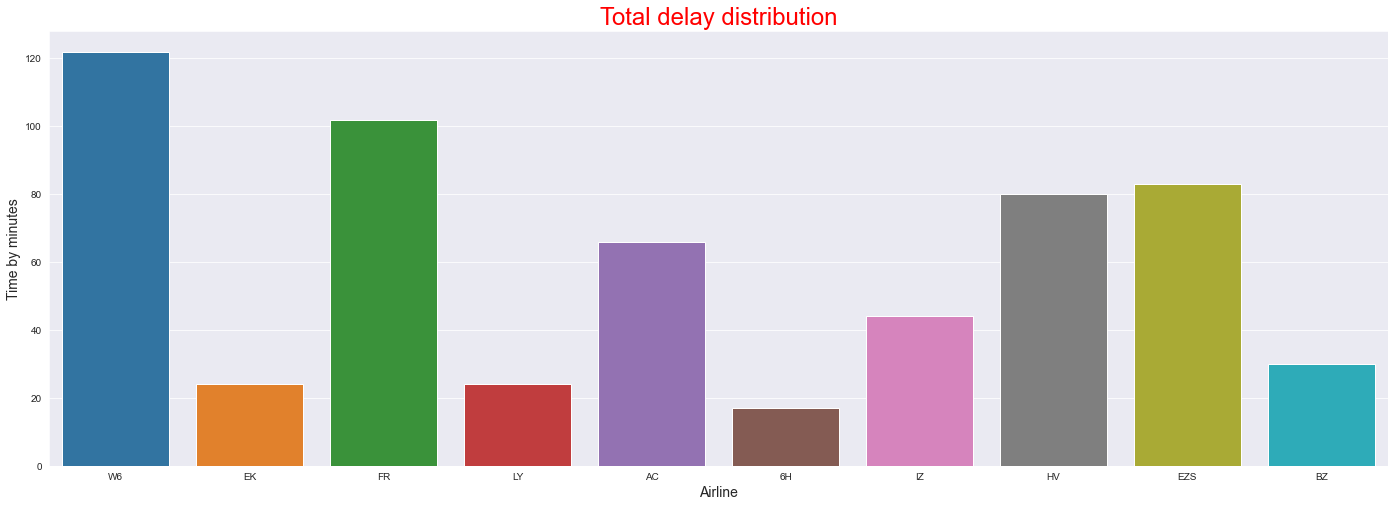

In [204]:
df10 = df9.head(10).query("delay_min<1100")

sb.set_style('darkgrid')
plt.figure(figsize = (24,8))
sb.barplot(y = 'delay_min', x = 'Airline', data = df10)
plt.title("Total delay distribution", color = "red", fontsize = 24)
plt.ylabel("Time by minutes", fontsize = 14)
plt.xlabel("Airline", fontsize = 14)
plt.show()

In [205]:
#"tk" the bad flights company

In [208]:
df10.save()

AttributeError: 'DataFrame' object has no attribute 'save'